In [53]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import matplotlib.pyplot as plt
from matplotlib import rc
import platform 

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)



In [54]:
import pandas as pd
import seaborn as sns

In [55]:
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


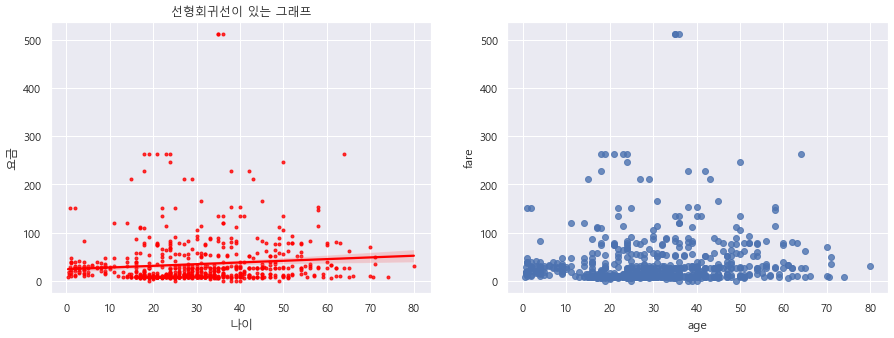

In [56]:
# seaborn 을 활용하여 회귀선이 있는 산점도 그리기
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형 회귀선 표시 
sns.regplot(x='age',    # x축 변수
            y='fare',   # y축 변수
            data= titanic,  # 데이터
            ax = ax1,
           color='red',
           marker='.') 
# 선형 회귀선 표시 안함 -> fig_reg = False 
sns.regplot(x='age',    # x축 변수
            y='fare',   # y축 변수
            data= titanic,  # 데이터
            ax = ax2,
           fit_reg=False) 

ax1.set_title('선형회귀선이 있는 그래프')
ax1.set_xlabel('나이')
ax1.set_ylabel('요금')

plt.show()

AttributeError: 'FacetGrid' object has no attribute 'set_title'

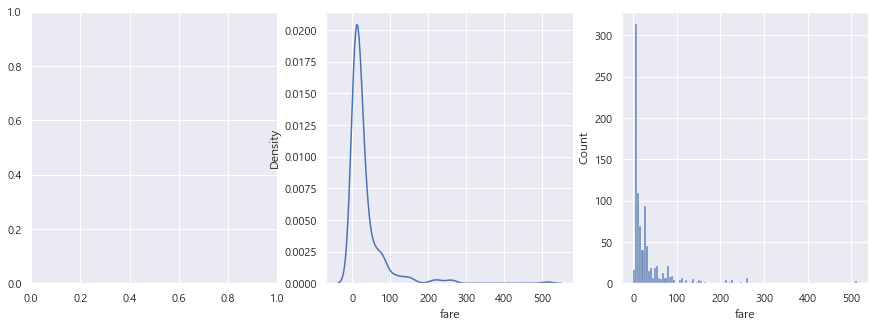

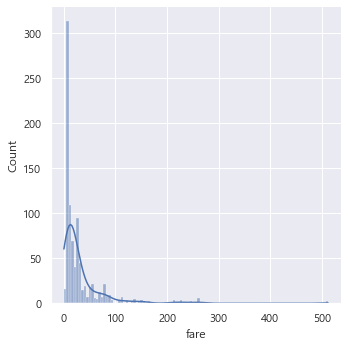

In [57]:
# 히스토그램 / 커널 밀도 함수
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# distplot
# sns.distplot(titanic['fare'],  ax=ax1)
# ax1 = sns.displot(x='fare', data=titanic, kde=True)#, ax=ax1)

# kdeplot 
sns.kdeplot(x='fare', data=titanic, ax=ax2)

# histplot
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare - hist / ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

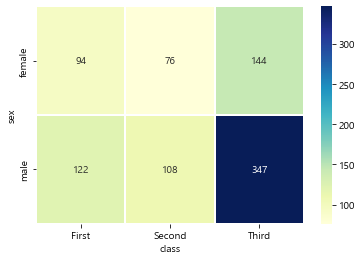

In [43]:
# 히트맵 
table = titanic.pivot_table(index=['sex'], columns=['class'], 
                           aggfunc='size')
# table

# heatmap 그리기
sns.heatmap(table, 
           annot=True, fmt='d',  # 그룹함수의 결과를 표시, 정수로
            cmap='YlGnBu',    # 원하는 컬러 맵
            linewidths=2,    # 구분선의 사이즈 
            cbar=True)

plt.show()

In [24]:
titanic['class'].unique()
titanic.sex.unique()

array(['male', 'female'], dtype=object)

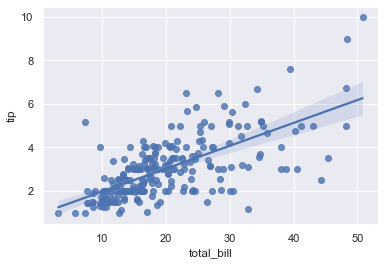

In [58]:
import seaborn as sns

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

plt.show()

In [63]:
print(sns.__version__)


0.11.2


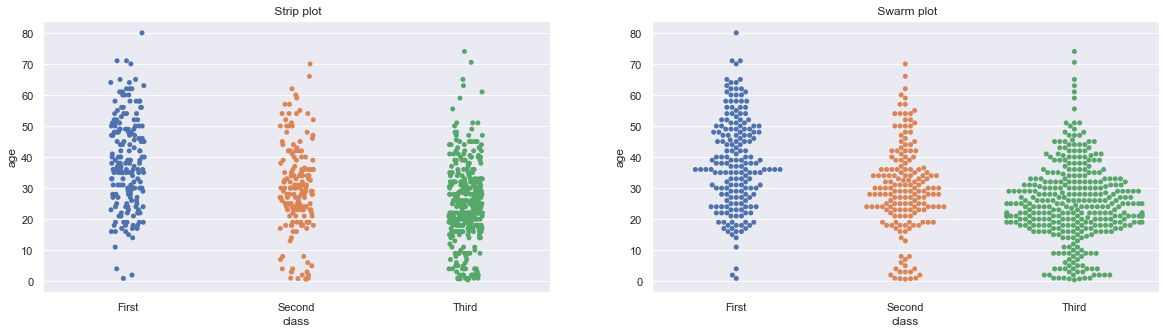

In [67]:
# 범주형 데이터 산점도
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포, 데이터 분산 미 고려 ( 중복 표시 함 )
sns.stripplot(x='class',
             y='age',
             data = titanic,
             ax = ax1)
sns.swarmplot(x='class',
             y='age',
             data = titanic,
              size=5,
             ax = ax2)

ax1.set_title(' Strip plot')
ax2.set_title(' Swarm plot')

plt.show()

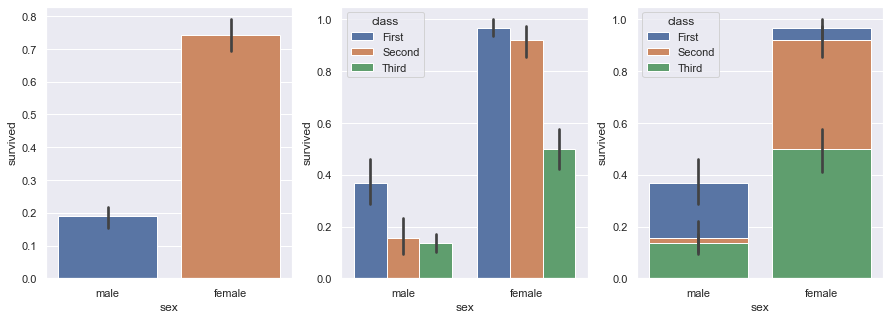

In [71]:
# 막대 그래프 : barplot()
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

sns.barplot(x='sex', y='survived', data=titanic,hue='class', ax=ax2)

sns.barplot(x='sex', y='survived', data=titanic,hue='class',
            dodge=False, ax=ax3)

plt.show()

In [70]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

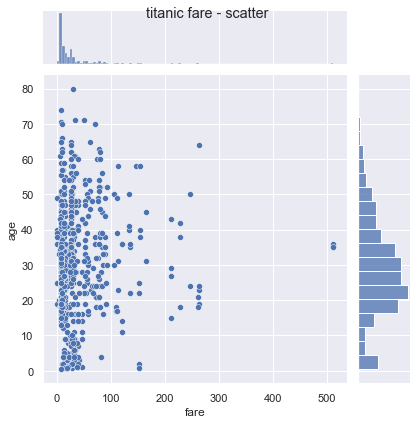

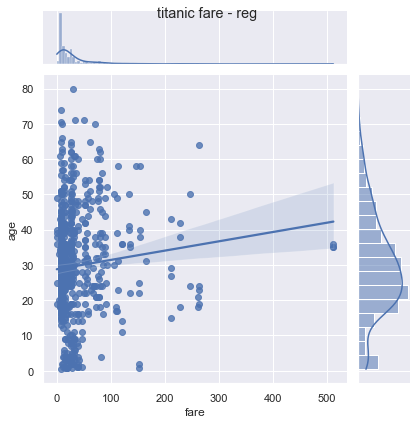

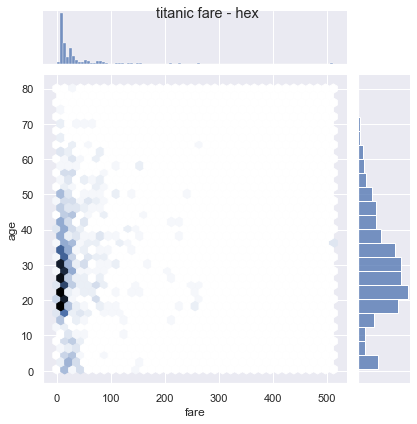

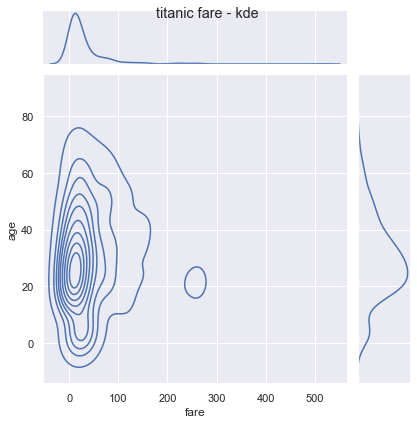

In [75]:
#  조인트 그래프 : jointplot() -> 산점도를 기본, x-y축에 변수에 대한 히스토그램

# 조인트 기본
j1 = sns.jointplot(x='fare', y='age',data=titanic)
# 회귀선이 있는 조인트
j2 = sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
#  조인트 육각 그래프
j3 = sns.jointplot(x='fare', y='age', data=titanic, kind='hex')
#  조인트 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', data=titanic, kind='kde')

j1.fig.suptitle('titanic fare - scatter')
j2.fig.suptitle('titanic fare - reg')
j3.fig.suptitle('titanic fare - hex')
j4.fig.suptitle('titanic fare - kde')
plt.show()


In [77]:
import sys


sys.stdin.flush()
a = sys.stdin.readline()
a